In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore")

In [ ]:
cars = pd.read_csv("cars_raw.csv")
cars.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,Eminent White Pearl,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


#1 Data Preprocessing

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

## At first we need to drop all cars that havent price

In [ ]:
cars = cars[cars['Price'] != 'Not Priced']

## and delete extra symbols in Price column

In [ ]:
cars['Price'] = cars['Price'].str.replace('$', '').str.replace(',', '').astype(int)
cars.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,Eminent White Pearl,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [ ]:
cars['Used/New'].value_counts()

Used                       7896
BMW Certified               247
Mercedes-Benz Certified     223
Honda Certified             208
Toyota Certified            153
Cadillac Certified          105
Ford Certified               71
Subaru Certified             58
Jeep Certified               54
Nissan Certified             50
Acura Certified              47
Chevrolet Certified          40
INFINITI Certified           34
Kia Certified                34
Volvo Certified              33
Porsche Certified            25
RAM Certified                24
Buick Certified              20
Volkswagen Certified         17
GMC Certified                13
Dodge Certified              10
Alfa Romeo Certified          7
Bentley Certified             2
MINI Certified                1
Ferrari Certified             1
Maserati Certified            1
Name: Used/New, dtype: int64

## Next we replace all types of "certified" into just "certified"

In [ ]:
cars['Used/New'] = cars['Used/New'].apply(lambda x: 'Certified' if x != 'Used' else x)
cars.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,Eminent White Pearl,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [ ]:
cars['Used/New'].value_counts()

Used         7896
Certified    1478
Name: Used/New, dtype: int64

In [ ]:
cars['Drivetrain'].value_counts()

All-wheel Drive      4474
Front-wheel Drive    2326
Four-wheel Drive     1549
Rear-wheel Drive      915
FWD                    36
AWD                    34
4WD                    20
RWD                    12
–                       7
Front Wheel Drive       1
Name: Drivetrain, dtype: int64

In [ ]:
cars = cars[cars['Drivetrain'] != '–']
cars['Drivetrain'].value_counts()

All-wheel Drive      4474
Front-wheel Drive    2326
Four-wheel Drive     1549
Rear-wheel Drive      915
FWD                    36
AWD                    34
4WD                    20
RWD                    12
Front Wheel Drive       1
Name: Drivetrain, dtype: int64

## Since we have several identical substrate type designations but spelled differently, we will bring them to common names.

In [ ]:
drivetrain_mapping = {
    'All-wheel Drive': 'AWD',
    'Front-wheel Drive': 'FWD',
    'Front Wheel Drive': 'FWD',
    'Four-wheel Drive': '4WD',
    'Rear-wheel Drive': 'RWD'
}

cars['Drivetrain'] = cars['Drivetrain'].replace(drivetrain_mapping)
cars['Drivetrain'].value_counts()

AWD    4508
FWD    2363
4WD    1569
RWD     927
Name: Drivetrain, dtype: int64

In [70]:
cars['FuelType'].value_counts()

Gasoline                         8894
Electric                          162
E85 Flex Fuel                     120
Hybrid                             69
Diesel                             45
Gasoline Fuel                      30
–                                  30
Electric Fuel System                5
Gasoline/Mild Electric Hybrid       5
Flex Fuel Capability                3
Flexible Fuel                       2
Plug-In Electric/Gas                1
Diesel Fuel                         1
Name: FuelType, dtype: int64

## same with the type of fuel

In [71]:
fuel_mapping = {
    'E85 Flex': 'Gasoline',
    'Gasoline Fuel': 'Gasoline',
    'Electric Fuel System': 'Electric',
    'Gasoline/Mild Electric Hybrid': 'Hybrid',
    'Flex Fuel Capability': 'Hybrid',
    'Flexible Fuel' : 'Hybrid',
    'Plug-In Electric/Gas' : 'Hybrid',
    'Diesel Fuel' : 'Diesel'
}
cars['FuelType'] = cars['FuelType'].replace(fuel_mapping)
cars['FuelType'].value_counts()

Gasoline         8924
Electric          167
E85 Flex Fuel     120
Hybrid             80
Diesel             46
–                  30
Name: FuelType, dtype: int64

In [72]:
cars[cars['FuelType'] == '–']

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
427,2020,Tesla,Model 3 Performance,Used,64900,4.3,16,Dealer,Sanford INFINITI,4.9,1001,995 Rinehart Road Sanford,FL,32771,Good,4.6,4.4,4.6,4.0,4.2,4.4,Deep Blue Metallic,White / Black,AWD,118,107,–,1-Speed Automatic,Electric,5YJ3E1EC8LF669680,NP669680,11733
620,2020,Tesla,Model 3 Performance,Used,60400,4.3,16,Dealer,Leonardtown Ford,4.6,135,26322 Point Lookout Rd Leonardtown,MD,20650,Good,4.6,4.4,4.6,4.0,4.2,4.4,Black,Black,AWD,118,107,–,1-Speed Automatic,0.0,5YJ3E1EC5LF602874,602874,46021
1334,2014,Mercedes-Benz,E-Class E 350,Used,17191,4.8,176,Dealer,Houston Direct Auto,4.2,909,1901 Little York Houston,TX,77093,Fair,4.9,4.8,4.8,4.6,4.9,4.8,Gray,Black,RWD,21,30,–,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDKJ5KB6EF227303,227303,104906
1526,2021,Tesla,Model 3 Standard Range Plus,Used,56472,3.0,1,Dealer,Federico Dodge Chrysler Jeep RAM,4.9,743,1875 E Edwardsville Rd Wood River,IL,62095,Good,3.0,4.0,5.0,2.0,4.0,1.0,Black,Black,RWD,150,133,–,1-Speed Automatic,Electric,5YJ3E1EA2MF854002,10398,15595
1671,2021,Tesla,Model 3 Long Range,Used,61921,3.0,1,Dealer,Antwerpen Chevrolet,5.0,5,6110 Sykesville Road Eldersburg,MD,21784,Good,3.0,4.0,5.0,2.0,4.0,1.0,Black,Black,AWD,141,127,–,1-Speed Automatic,0 0.0,5YJ3E1EB9MF979541,9045TC,19979
2415,2021,Tesla,Model 3 Standard Range Plus,Used,57982,3.0,1,Dealer,Brandon Hyundai,4.3,5425,9915 East Adamo Drive Tampa,FL,33619,Great,3.0,4.0,5.0,2.0,4.0,1.0,Pearl White,Black,RWD,150,133,–,1-Speed Automatic,Electric,5YJ3E1EAXMF017787,A226894A,13683
2481,2020,Tesla,Model 3 Long Range,Used,59995,4.3,16,Dealer,Highline Auto Sales,4.6,327,555 Executive Dr Willowbrook,IL,60527,Great,4.6,4.4,4.6,4.0,4.2,4.4,Pearl White Multi,White / Black,AWD,124,116,–,1-Speed Automatic,–,5YJ3E1EB3LF525400,HL6224,15514
2633,2020,Tesla,Model 3 Performance,Used,67995,4.3,16,Dealer,Marin Acura,4.9,1121,5860 Paradise Dr Corte Madera,CA,94925,Great,4.6,4.4,4.6,4.0,4.2,4.4,Black,Black,AWD,118,107,–,1-Speed Automatic,Electric,5YJ3E1EC2LF742011,21492,22761
3305,2014,Mercedes-Benz,E-Class E 350,Used,29998,4.8,176,Dealer,CarMax Texas Stadium (Irving) - Now offering C...,3.4,12,3100 Spur 482 Irving,TX,75062,Fair,4.9,4.8,4.8,4.6,4.9,4.8,Silver,Red,RWD,21,30,–,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDKJ5KBXEF291456,23036133,34689
3393,2021,Tesla,Model 3 Standard Range Plus,Used,53500,3.0,1,Dealer,Yates Buick GMC,4.7,505,13845 W Test Dr Goodyear,AZ,85338,Great,3.0,4.0,5.0,2.0,4.0,1.0,Black,Black,RWD,150,133,–,1-Speed Automatic,Electric,5YJ3E1EA4MF867866,118184,16142


In [74]:
cars.loc[(cars['Make'] == 'Tesla') & (cars['FuelType'] == '–'), 'FuelType'] = 'Electric'
cars.loc[(cars['Make'] == 'Mercedes-Benz') & (cars['FuelType'] == '–'), 'FuelType'] = 'Gasoline'
cars.loc[(cars['Make'] == 'Chrysler') & (cars['FuelType'] == '–'), 'FuelType'] = 'Gasoline'
cars.loc[(cars['Make'] == 'Dodge') & (cars['FuelType'] == '–'), 'FuelType'] = 'Gasoline'
cars['FuelType'].value_counts()

Gasoline         8932
Electric          189
E85 Flex Fuel     120
Hybrid             80
Diesel             46
Name: FuelType, dtype: int64

In [ ]:
cars['Model'].value_counts()

Grand Cherokee Limited        266
CR-V EX-L                     189
X5 xDrive40i                  164
XT5 Luxury                    142
RAV4 LE                       112
                             ... 
F-PACE 30t Prestige             1
RX 350L L                       1
Z4 sDrive35i                    1
Highlander Hybrid Platinum      1
Santa Fe Ultimate 2.4           1
Name: Model, Length: 1303, dtype: int64

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9367 non-null   int64  
 1   Make                   9367 non-null   object 
 2   Model                  9367 non-null   object 
 3   Used/New               9367 non-null   object 
 4   Price                  9367 non-null   int64  
 5   ConsumerRating         9367 non-null   float64
 6   ConsumerReviews        9367 non-null   int64  
 7   SellerType             9367 non-null   object 
 8   SellerName             9367 non-null   object 
 9   SellerRating           9367 non-null   float64
 10  SellerReviews          9367 non-null   int64  
 11  StreetName             9367 non-null   object 
 12  State                  9367 non-null   object 
 13  Zipcode                9367 non-null   object 
 14  DealType               9146 non-null   object 
 15  Comf

In [ ]:
cars['DealType'].value_counts(
)

Good     5518
Great    2403
Fair     1225
Name: DealType, dtype: int64

## let's fill in the missing values with the help of fashion as there are not many of them

In [75]:
cars['DealType'] = cars['DealType'].fillna(cars['DealType'].mode()[0])
cars['DealType'].value_counts()

Good     5739
Great    2403
Fair     1225
Name: DealType, dtype: int64

In [76]:
cars[(cars['Make'] == 'Honda') & (cars['Model'] == 'Accord Sport SE')]

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,Good,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,FWD,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
2428,2017,Honda,Accord Sport SE,Used,18950,4.8,572,Private,Richard,4.5,417,Lutherville Timonium,MD,21093,Good,4.8,4.8,4.8,4.8,4.8,4.9,Gray,Black,FWD,23,32,Gasoline,M/T,189.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,1HGCR2E17HA269877,–,72000


In [ ]:
cars[cars['DealType'].isna()]

# Data vizualisation

# lets build correlation graphs

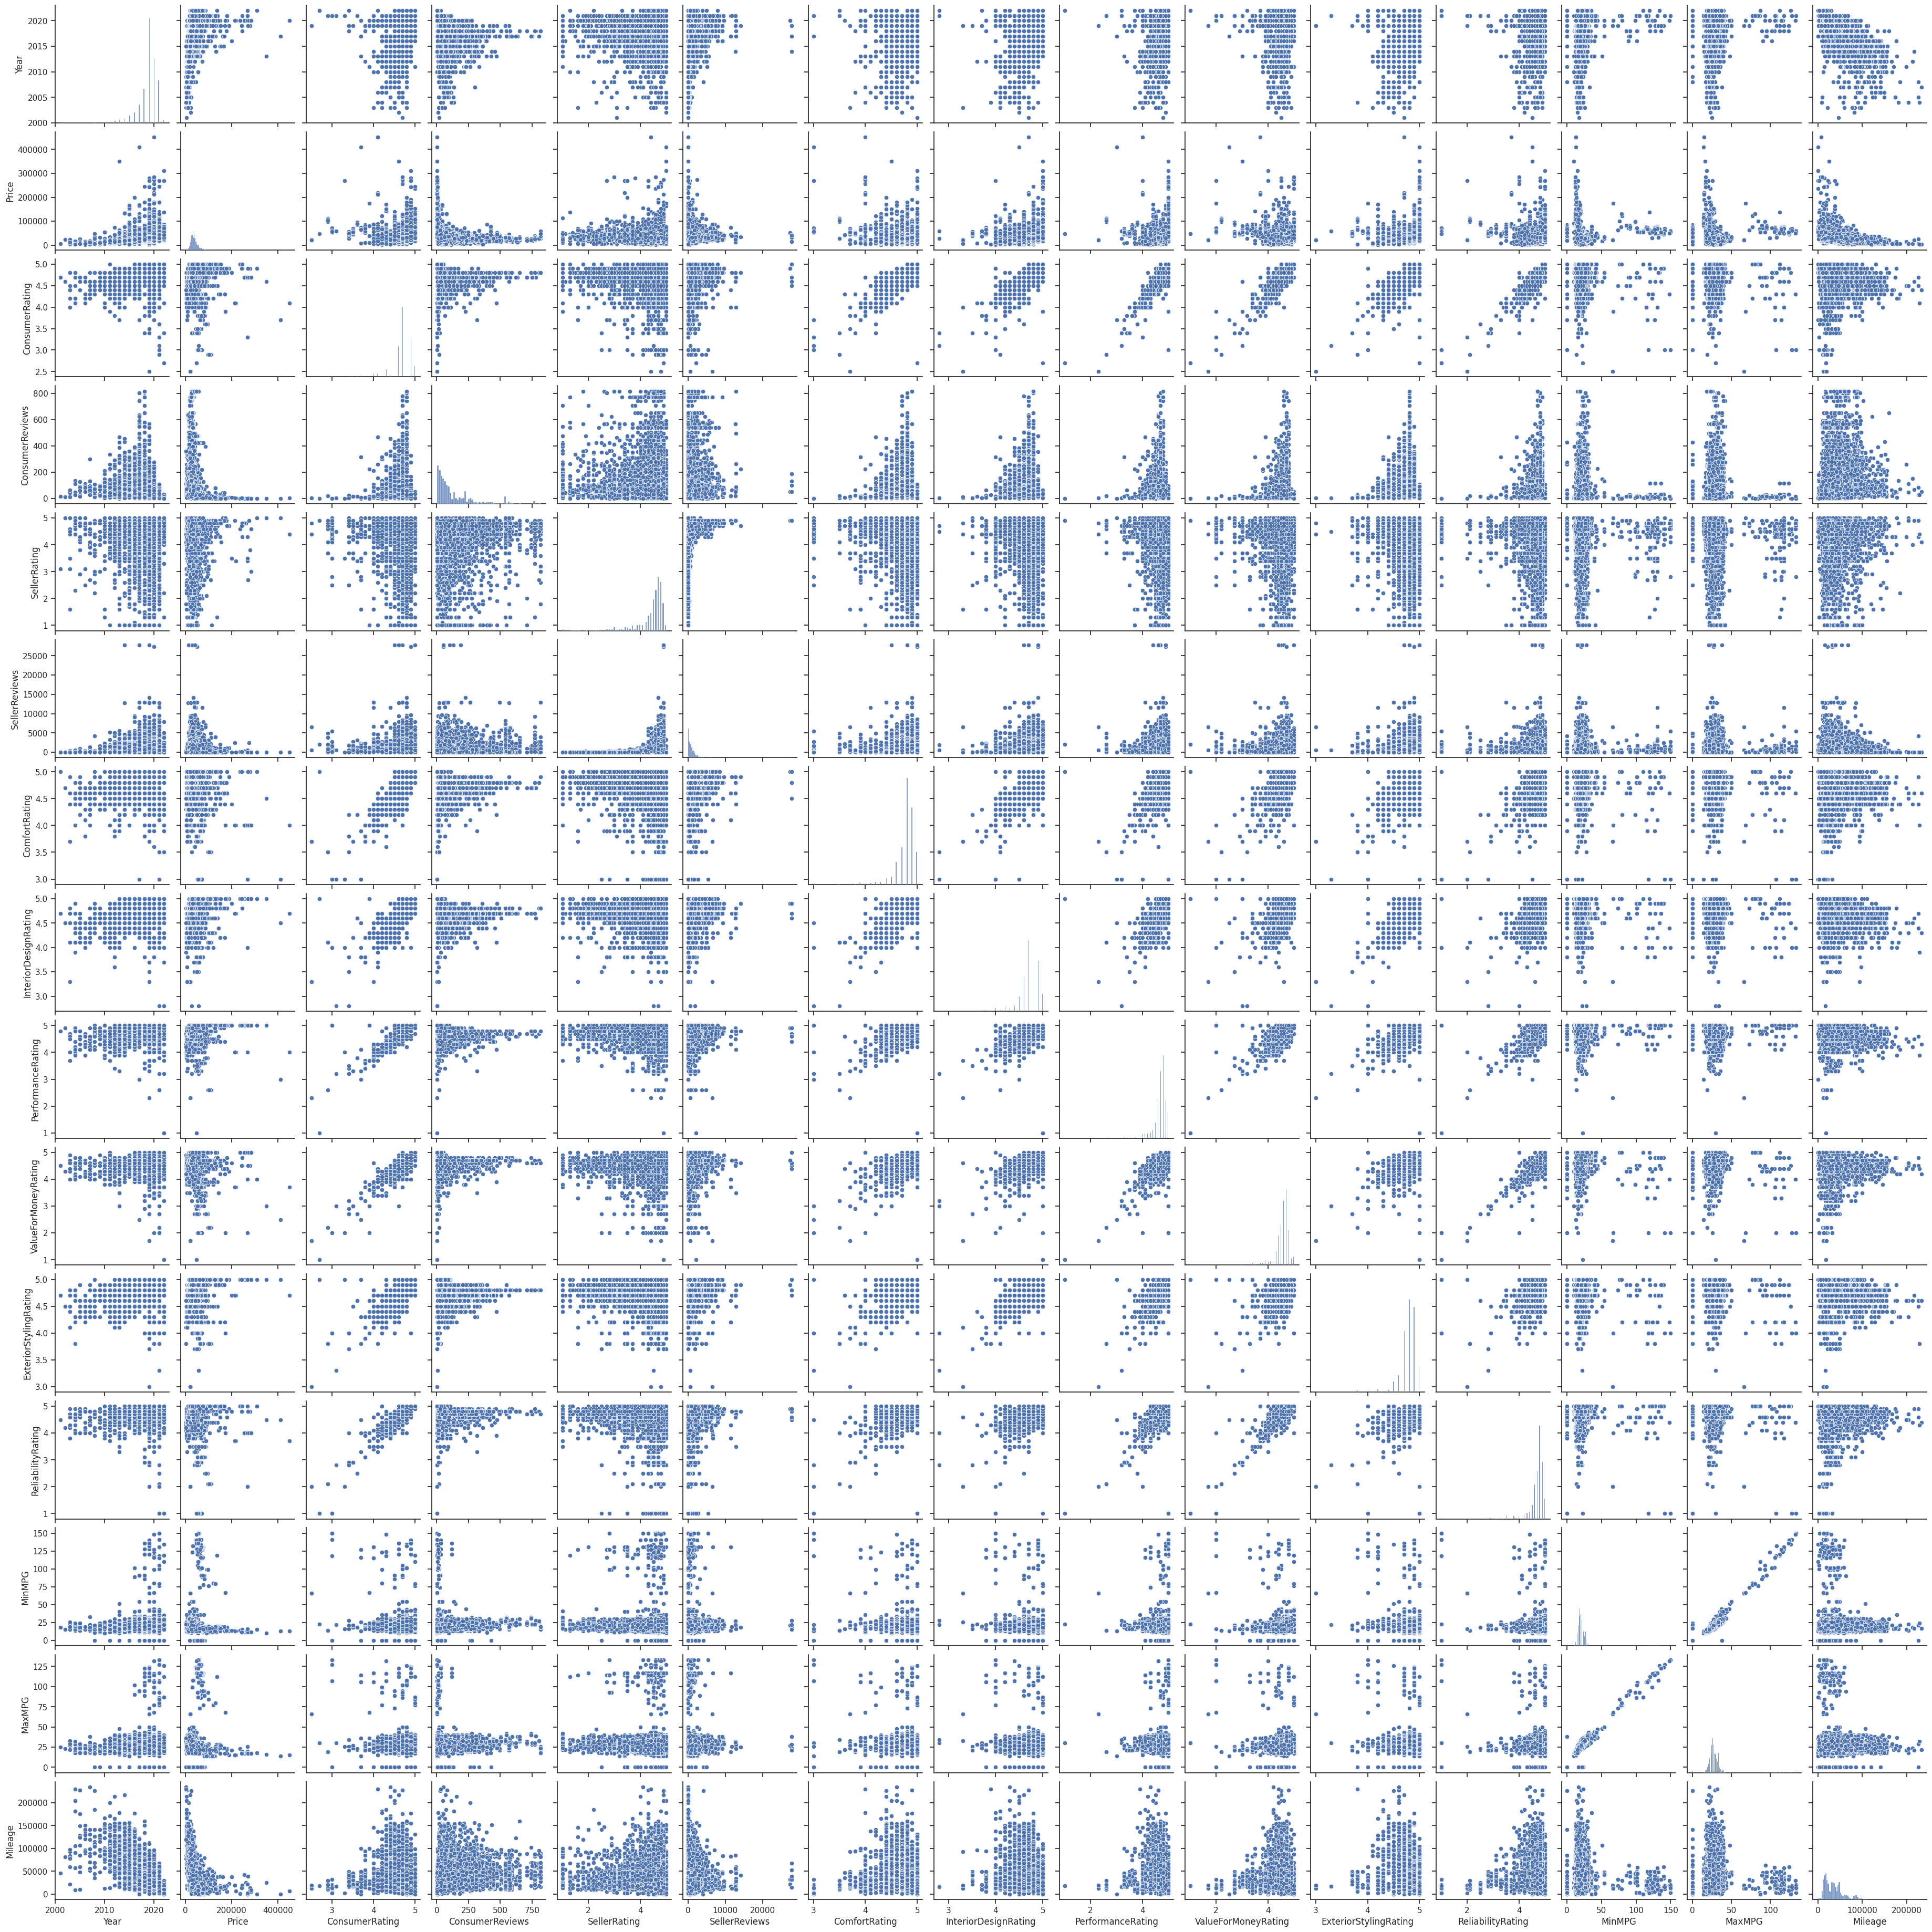

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = cars.select_dtypes(include=['int64', 'float64'])

# Create pairplot using seaborn
sns.set(style="ticks")
sns.pairplot(numeric_columns)

# Display the plot
plt.show()

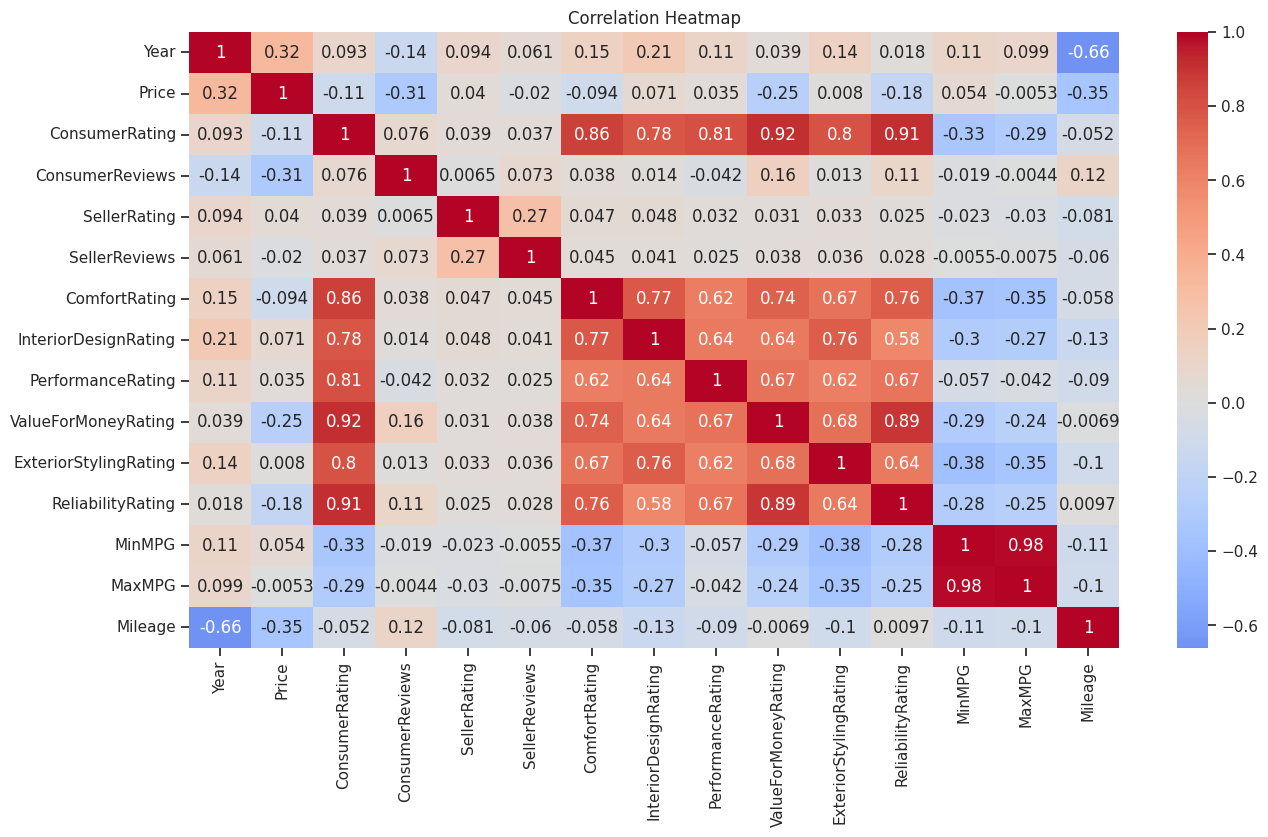

In [ ]:
correlation_matrix = cars.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
cars[(cars['Make'] == 'Lexus') & (cars['Model'] == 'RX 350')].sort_values(by='Price', ascending=False)

In [ ]:
cars['SellerType'].value_counts()

Dealer     9327
Private      40
Name: SellerType, dtype: int64

## Let's display the price values for each car brand

In [93]:
cars.groupby('Make')['Price'].agg(Max_Price='max', Avg_Price='mean', Min_Price='min').sort_values(by='Avg_Price', ascending=False)

,Max_Price,Avg_Price,Min_Price
Make,,,
Lamborghini,349995,269581.571429,199500
Ferrari,244900,244900.000000,244900
Bentley,268285,146911.833333,54533
Porsche,309888,74530.375940,9995
Tesla,137998,67350.607527,45992
Land,140000,61373.287356,12930
Maserati,65985,50788.000000,41518
RAM,91993,50448.765517,30599
GMC,89931,49299.296000,16975


## Let's create our database for future training and usage

In [77]:
data = cars[['Year', 'Make', 'Model', 'Used/New', 'Price', 'ConsumerRating','ConsumerReviews',
            'Drivetrain', 'MinMPG', 'MaxMPG', 'FuelType', 'Mileage']]
data.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,Drivetrain,MinMPG,MaxMPG,FuelType,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,FWD,19,27,Gasoline,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,4WD,19,24,Gasoline,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,4WD,15,21,Gasoline,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,FWD,29,35,Gasoline,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,FWD,20,27,Gasoline,28137


In [ ]:
data.select_dtypes(include=['object'])

,Make,Model,Used/New,Drivetrain,FuelType
0,Toyota,Sienna SE,Used,FWD,Gasoline
1,Ford,F-150 Lariat,Used,4WD,Gasoline
2,RAM,1500 Laramie,Used,4WD,Gasoline
3,Honda,Accord Sport SE,Used,FWD,Gasoline
4,Lexus,RX 350,Used,FWD,Gasoline
...,...,...,...,...,...
9374,Subaru,Crosstrek 2.0i Premium,Used,AWD,Gasoline
9375,Audi,Q8 3.0T Premium,Used,AWD,Hybrid
9376,Buick,Enclave Leather,Used,AWD,Gasoline
9377,Subaru,Forester Premium,Used,AWD,Gasoline


In [78]:
# reduce all values to lower case
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.str.lower())

# remove spaces in the module names
data['Model'] = data['Model'].str.replace(' ', '')

data.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,Drivetrain,MinMPG,MaxMPG,FuelType,Mileage
0,2019,toyota,siennase,used,39998,4.6,45,fwd,19,27,gasoline,29403
1,2018,ford,f-150lariat,used,49985,4.8,817,4wd,19,24,gasoline,32929
2,2017,ram,1500laramie,used,41860,4.7,495,4wd,15,21,gasoline,23173
3,2021,honda,accordsportse,used,28500,5.0,36,fwd,29,35,gasoline,10598
4,2020,lexus,rx350,used,49000,4.8,76,fwd,20,27,gasoline,28137


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 9378
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             9367 non-null   int64  
 1   Make             9367 non-null   object 
 2   Model            9367 non-null   object 
 3   Used/New         9367 non-null   object 
 4   Price            9367 non-null   int64  
 5   ConsumerRating   9367 non-null   float64
 6   ConsumerReviews  9367 non-null   int64  
 7   Drivetrain       9367 non-null   object 
 8   MinMPG           9367 non-null   int64  
 9   MaxMPG           9367 non-null   int64  
 10  FuelType         9367 non-null   object 
 11  Mileage          9367 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 951.3+ KB


In [90]:
# saving database
data.to_csv('machine_db.csv', index=False)

## Pre-process the dataset using pd.get_dummies

In [79]:
categorical_columns = ['Make', 'Model', 'Used/New', 'Drivetrain', 'FuelType']
dummies = pd.get_dummies(data[categorical_columns])

processed_data = pd.concat([data.drop(columns=categorical_columns), dummies], axis=1)

processed_data.head()

,Year,Price,ConsumerRating,ConsumerReviews,MinMPG,MaxMPG,Mileage,Make_acura,Make_alfa,Make_audi,Make_bentley,Make_bmw,Make_buick,Make_cadillac,Make_chevrolet,Make_chrysler,Make_dodge,Make_ferrari,Make_fiat,Make_ford,Make_genesis,Make_gmc,Make_honda,Make_hyundai,Make_infiniti,Make_jaguar,Make_jeep,Make_kia,Make_lamborghini,Make_land,Make_lexus,Make_lincoln,Make_maserati,Make_mazda,Make_mercedes-benz,Make_mercury,Make_mini,Make_mitsubishi,Make_nissan,Make_porsche,Make_ram,Make_saturn,Make_scion,Make_subaru,Make_tesla,Make_toyota,Make_volkswagen,Make_volvo,Model_128128i,Model_1500bighorn,Model_1500classicslt,Model_1500classicwarlock,Model_1500laramie,Model_1500limited,Model_1500lonestar,Model_1500longhorn,Model_1500rebel,Model_1500trx,Model_200limited,Model_200s,Model_228grancoupe228isdrivegrancoupe,Model_228grancoupeixdrive,Model_228ixdrive,Model_300cbase,Model_300limited,Model_300s,Model_320320ixdrive,Model_320i,Model_320ixdrive,Model_328dbase,Model_328dxdrive,Model_328granturismoixdrive,Model_328i,Model_328ixdrive,Model_330granturismoixdrive,Model_330i,Model_330ixdrive,Model_335335i,Model_335i,Model_340ixdrive,Model_370zsport,Model_428i,Model_428isulev,Model_428ixdrive,Model_430grancoupei,Model_430grancoupeixdrive,Model_430i,Model_430ixdrive,Model_435grancoupei,Model_435grancoupeixdrive,Model_435i,Model_435ixdrive,Model_440grancoupeixdrive,Model_440ixdrive,Model_4runnerlimited,Model_4runnerlimited4wd,Model_4runnerlimitednightshade,Model_4runnernightshade,Model_4runnersr5,Model_4runnersr54wd,Model_4runnersr5premium,Model_4runnertrailpremium,Model_4runnertrdoffroad,Model_4runnertrdoffroadpremium,Model_4runnertrdpro,Model_500leasy,Model_528i,Model_528ixdrive,Model_530i,Model_530ixdrive,Model_535i,Model_535ixdrive,Model_540i,Model_540ixdrive,Model_550ixdrive,Model_640granturismoixdrive,Model_718boxsterbase,Model_718boxsters,Model_718caymangts,Model_718caymans,Model_740i,Model_740ixdrive,Model_750i,Model_750ixdrive,Model_750li,Model_911carrera,Model_911carrera4,Model_911carrera4coupe,Model_911carrera4s,Model_911carreragts,Model_911carreras,Model_911gt3,Model_911targa4,Model_911targa4s,Model_911turbo,Model_911turbos,Model_a-classa220,Model_a-classa2204matic,Model_a31.8tpremiumplus,Model_a32.0tpremium,Model_a32.0tpremiumplus,Model_a32.0tprestige,Model_a42.0tpremium,Model_a42.0tpremiumplus,Model_a42.0tpremiumplusquattro,Model_a42.0ttitaniumpremium,Model_a440premium,Model_a440premiumplus,Model_a445slinequattropremium,Model_a4premiumplus,Model_a52.0tpremium,Model_a52.0tpremiumplus,Model_a540premium,Model_a62.0tpremiumplus,Model_a62.0tpremiumplusquattro,Model_a62.0tquattrosport,Model_a63.0tprestige,Model_a63.0tsport,Model_a655premium,Model_a655premiumplus,Model_a73.0tpremiumplus,Model_a73.0tprestige,Model_a73.0tprestigequattro,Model_a8l4.0t,Model_a8l55,Model_acadiadenali,Model_acadialimitedlimited,Model_acadiasle,Model_acadiasle-1,Model_acadiasle-2,Model_acadiaslt,Model_acadiaslt-1,Model_accordex,Model_accordex-l,Model_accordex-l1.5t,Model_accordex-l2.0t,Model_accordlx,Model_accordlx1.5t,Model_accordsport,Model_accordsport1.5t,Model_accordsport2.0t,Model_accordsportse,Model_accordtouring,Model_accordtouring2.0t,Model_altima2.5platinum,Model_altima2.5s,Model_altima2.5sl,Model_altima2.5sr,Model_amgc43base4matic,Model_amgc63base,Model_amgc63s,Model_amge53base4matic,Model_amge63s4matic,Model_amgg63base,Model_amgglc43base4matic,Model_amgglc63s4matic,Model_amggle434maticcoupe,Model_amggle43coupe4matic,Model_amggle534maticcoupe,Model_amggle53base,Model_amggleamggle63s-model4matic,Model_amggt634-door,Model_amgs634matic,Model_armadaplatinum,Model_armadasl,Model_arteon2.0tselpremiumr-line,Model_arteon2.0tser-line,Model_ascentlimited7-passenger,Model_ascentlimited8-passenger,Model_ascentpremium,Model_ascentpremium7-passenger,Model_ascentpremium8-passenger,Model_ascenttouring7-passenger,Model_aspenlimited,Model_atlas2.0ts,Model_atlas2.0tse,Model_atlas3.6ls,Model_atlas3.6lsel,Model_atlas3.6lselpremium,Model_atlas3.6lsew/technology,Model_atlas3.6lv6se

# Training data

In [80]:
from sklearn.model_selection import train_test_split #for splitting data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
import lightgbm as lgb

import time

In [81]:
X, y = processed_data.drop(['Price'], axis=1), processed_data['Price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1706) #split data

In [83]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Linear SVR' : LinearSVR(),
}

#df for results
evaluation_df = pd.DataFrame({
    'Model': [],
    'MSE': [],
    'MAE': [],
    'R-squared': []
})

#train our models
for name, model in models.items():

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    pred = model.predict(X_test)

    training_time = end_time - start_time
    print(f"{name} training is finished")
    print(f"Spended time - {training_time}")
    print("~"*20)
    print("\n")

    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r_squared = r2_score(y_test, pred)

    evaluation_df = evaluation_df.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R-squared': r_squared
    }, ignore_index=True)


Linear Regression training is finished
Spended time - 4.096520900726318
~~~~~~~~~~~~~~~~~~~~


Decision Tree training is finished
Spended time - 0.7215883731842041
~~~~~~~~~~~~~~~~~~~~


Random Forest training is finished
Spended time - 25.726336002349854
~~~~~~~~~~~~~~~~~~~~


SVR training is finished
Spended time - 65.68955755233765
~~~~~~~~~~~~~~~~~~~~


XGBoost training is finished
Spended time - 39.20598077774048
~~~~~~~~~~~~~~~~~~~~


LightGBM training is finished
Spended time - 2.0386202335357666
~~~~~~~~~~~~~~~~~~~~


Gradient Boosting Regressor training is finished
Spended time - 12.264648914337158
~~~~~~~~~~~~~~~~~~~~


ADA Boost training is finished
Spended time - 19.71290135383606
~~~~~~~~~~~~~~~~~~~~


Linear SVR training is finished
Spended time - 0.7629401683807373
~~~~~~~~~~~~~~~~~~~~




In [84]:
evaluation_df.sort_values(by='MSE', ascending=True)

,Model,MSE,MAE,R-squared
4,XGBoost,1.075538e+08,4076.545636,0.825334
5,LightGBM,1.213095e+08,4248.990529,0.802995
2,Random Forest,1.376199e+08,3699.589753,0.776507
1,Decision Tree,1.403985e+08,4178.106724,0.771995
6,Gradient Boosting Regressor,1.733529e+08,6232.559784,0.718477
0,Linear Regression,1.749509e+08,4069.439402,0.715882
7,ADA Boost,4.458521e+08,16080.576992,0.275942
8,Linear SVR,6.183205e+08,13641.750020,-0.004145
3,SVR,6.272956e+08,12650.714319,-0.018720


## Use the best model

In [85]:
model = xgb.XGBRegressor()
# model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("MSE: ",mean_squared_error(y_test, pred),'\n',
      "MAE: ",mean_absolute_error(y_test, pred), "\n",
      'R2: ',r2_score(y_test, pred)
    )

MSE:  107553827.15547904 
 MAE:  4076.5456355368697 
 R2:  0.8253339676185446


In [95]:
# save our model
import joblib
joblib.dump(model, 'xgbregressor.pkl')

['xgbregressor.pkl']

In [87]:
error = mean_absolute_error(y_test, pred)

In [94]:
# save the column names to a separate file
with open('column_names.txt', 'w') as file:
    file.write('\n'.join(processed_data.columns))